# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - recieved guidance from Xpert Learning Assistant
    city_url = f"{url}&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - recieved guidance from Xpert Learning Assistant
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | fale old settlement
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ndibene dahra
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | roma
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | boumahra ahmed
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | kaa-khem
Processing Record 15 of Set 1 | kosciusko
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | banyo
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | sarmiento
Processing Rec

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alice springs,-23.7000,133.8833,294.90,46,100,4.63,AU,1715135205
1,punta arenas,-53.1500,-70.9167,276.21,87,75,4.12,CL,1715135276
2,fale old settlement,-9.3852,-171.2468,302.60,74,93,4.68,TK,1715135276
3,waitangi,-43.9535,-176.5597,283.61,72,12,1.34,NZ,1715135276
4,albany,42.6001,-73.9662,290.26,53,100,1.55,US,1715135057


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,294.90,46,100,4.63,AU,1715135205
1,punta arenas,-53.1500,-70.9167,276.21,87,75,4.12,CL,1715135276
2,fale old settlement,-9.3852,-171.2468,302.60,74,93,4.68,TK,1715135276
3,waitangi,-43.9535,-176.5597,283.61,72,12,1.34,NZ,1715135276
4,albany,42.6001,-73.9662,290.26,53,100,1.55,US,1715135057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

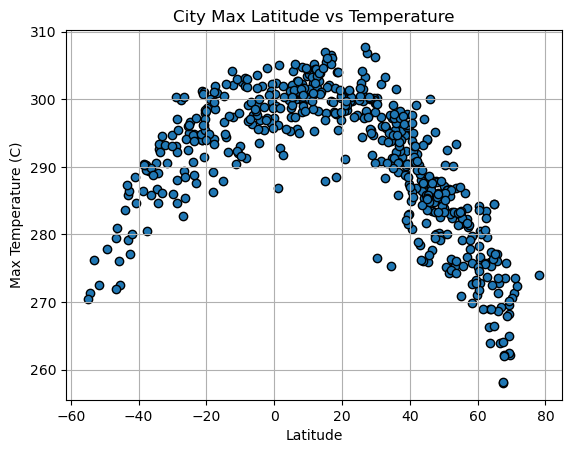

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

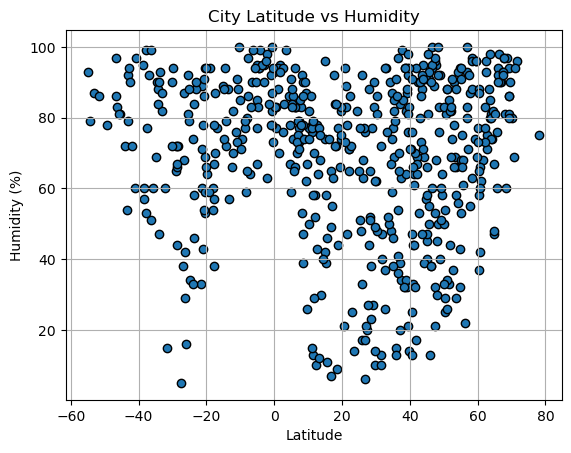

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

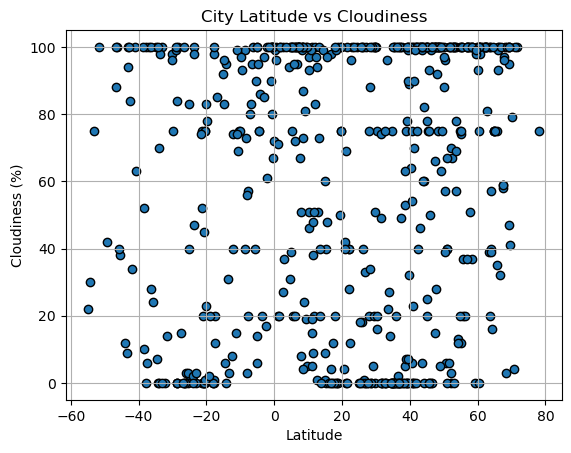

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

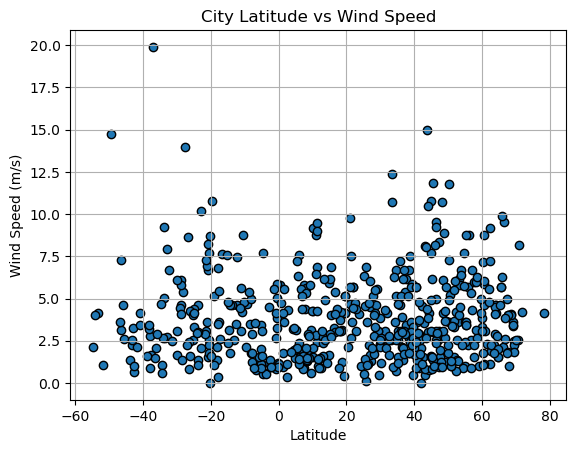

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,albany,42.6001,-73.9662,290.26,53,100,1.55,US,1715135057
5,ndibene dahra,15.3338,-15.4766,297.90,39,0,4.00,SN,1715135277
6,praia da vitoria,38.7333,-27.0667,292.29,82,75,7.53,PT,1715135277
7,constantia,44.1833,28.6500,287.53,91,82,3.01,RO,1715135277
8,roma,43.2128,-75.4557,288.00,73,100,0.45,US,1715135277


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,294.90,46,100,4.63,AU,1715135205
1,punta arenas,-53.1500,-70.9167,276.21,87,75,4.12,CL,1715135276
2,fale old settlement,-9.3852,-171.2468,302.60,74,93,4.68,TK,1715135276
3,waitangi,-43.9535,-176.5597,283.61,72,12,1.34,NZ,1715135276
10,atafu village,-8.5421,-172.5159,301.95,77,99,3.50,TK,1715135278


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8607891965724441


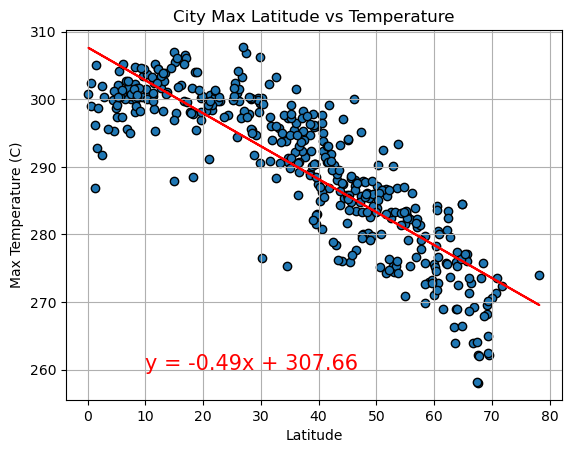

In [78]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (10, 260), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()


The r value is: 0.7927631809659197


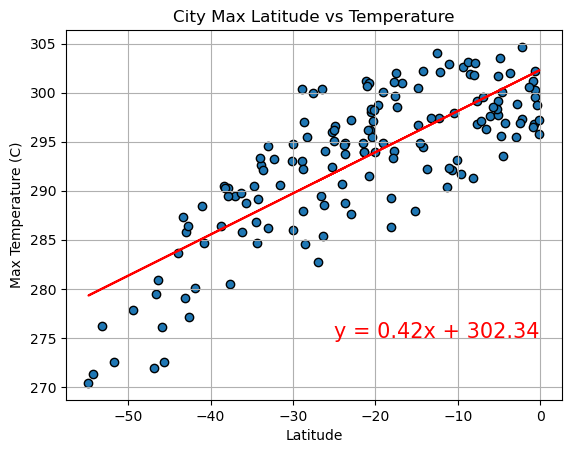

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-25, 275), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.11921205268549243


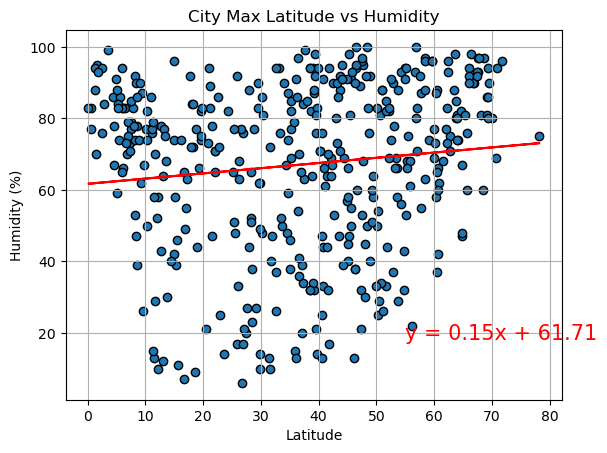

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (55, 18), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: 0.13977668894804485


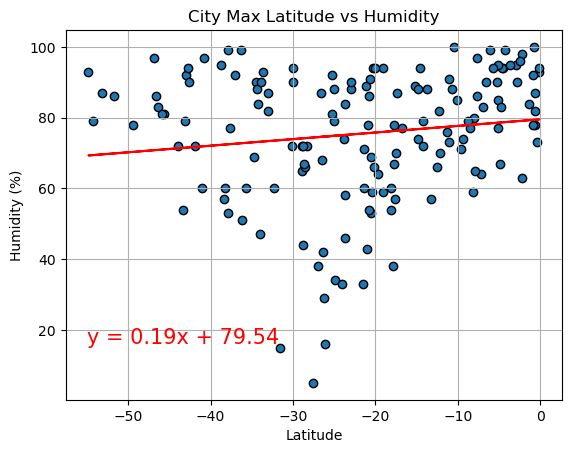

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 16), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.13016450378180883


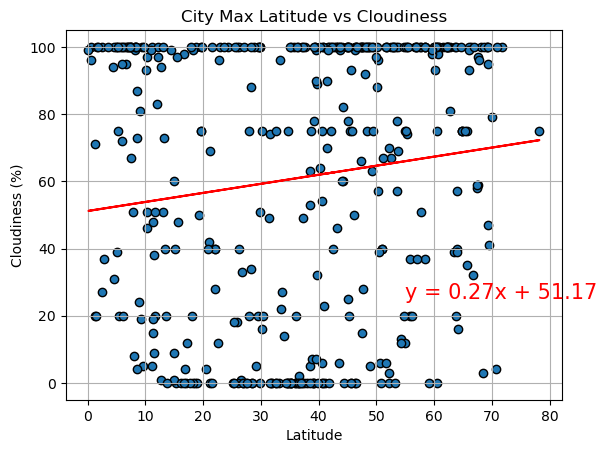

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (55, 25), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: 0.1291681790327808


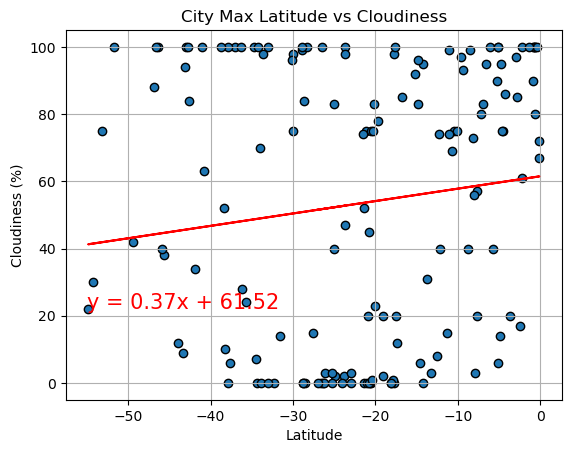

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 22), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation in both the northern and southern hemispheres between the cities' latitudes and cloudiness percentages.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.09959474627026987


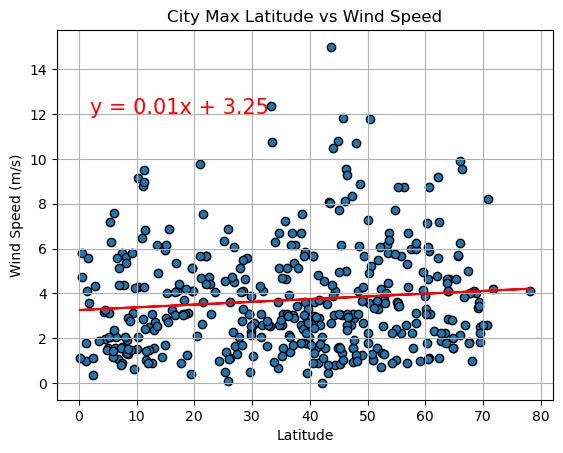

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (2, 12), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: -0.12387960153410615


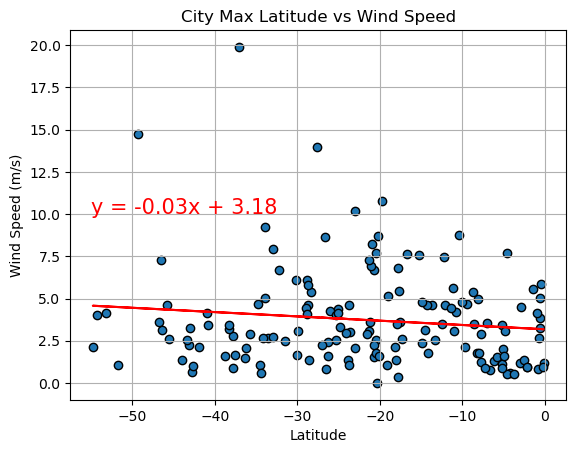

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** There is a very weak negative correlation between southern hemisphere cities' latitudes and max wind speeds. There is a very weak positive correlation between northern hemisphere cities' latitudes and max wind speeds.